<div style="background:#222222; color:#ffffff; padding:20px">
    <h2 align="center">Deep Learning Fundamentals</h2>
    <h2 align="center" style="color:#01ff84">Regression: Exercise</h2>
<div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from sklearn.preprocessing import StandardScaler

In [2]:
def generate_data_1d(points, min, max, fn, noise, seed=0):
    np.random.seed(seed)
    x = np.random.uniform(low=min, high=max, size=(points, 1))
    np.random.seed(seed)
    y = fn(x[:,0]) + np.random.normal(scale=noise, size=points)
    return x, y

def plot(x, y, pred_x=None, pred_y=None, ax=plt):
    ax.plot(x, y, '.', label='data')
    if pred_x is not None:
        ax.plot(pred_x, pred_y, '.', color='r', label='our function')
    ax.legend();

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise solved</strong>
  <p>Train a linear model to fit the data</p>
<div>

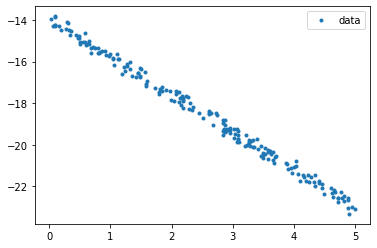

In [3]:
x,y = generate_data_1d(points=200, min=0, max=5, fn=lambda x: -x*1.8 - 14, noise=0.2)
pred_x = np.linspace(start=-0.5, stop=5.5, num=100)
plot(x,y)

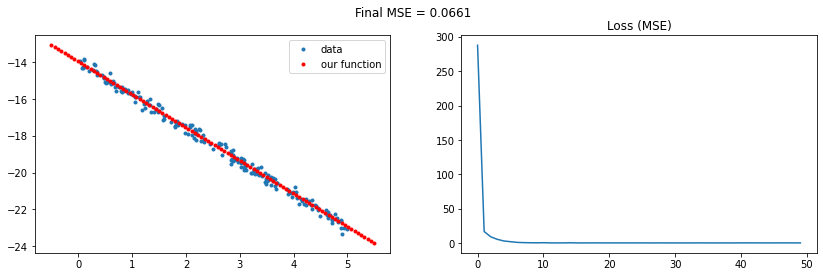

In [4]:
inp = keras.Input(shape=(1,))
out = layers.Dense(1, name='regression')(inp)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss='mse', optimizer=optimizers.SGD(0.1))
hist = model.fit(x, y, epochs=50, batch_size=32, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 1</strong>
  <p>Train a MLP in less than 100 epochs to get a MSE lower than 0.1</p>
<div>

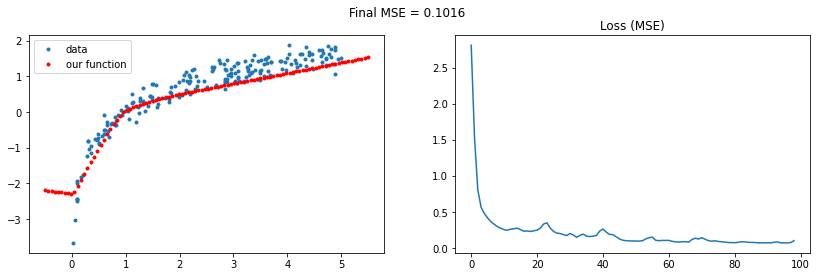

In [5]:
model = keras.Sequential([
    layers.Dense(units=100, activation='relu', input_shape=(1,)),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=1, name='regression')
])

x,y = generate_data_1d(points=200, min=0, max=5, fn=np.log, noise=0.2)
pred_x = np.linspace(start=-0.5, stop=5.5, num=100)

model.compile(loss='mse', optimizer=optimizers.SGD(0.1))
hist = model.fit(x, y, epochs=99, batch_size=100, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 2</strong>
  <p>Train a MLP in less than 100 epochs to get a loss lower than 0.06</p>
<div>

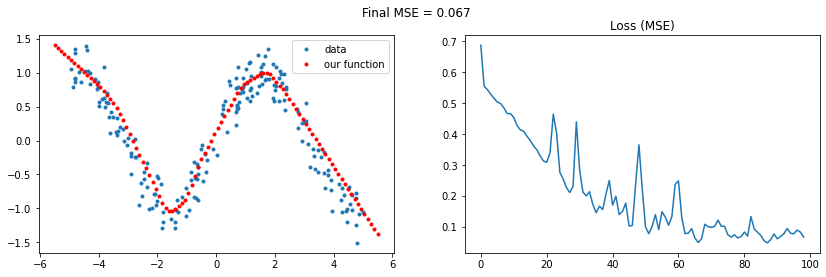

In [6]:
model = keras.Sequential([
    layers.Dense(units=7, activation='relu', input_shape=(1,)),
    layers.Dense(units=10, activation='relu'),
    layers.Dense(units=20, activation='relu'),
    layers.Dense(units=1, name='regression')
])

x,y = generate_data_1d(points=200, min=-5, max=5, fn=np.sin, noise=0.2)
pred_x = np.linspace(start=-5.5, stop=5.5, num=100)

model.compile(loss='mse', optimizer=optimizers.SGD(0.1))
hist = model.fit(x, y, epochs=99, batch_size=100, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 3</strong>
  <p>Train a MLP to fit the data.</p>
  <p>Hint: <strong style="color:#01ff84">Standard scale</strong> the data.</p>
<div>

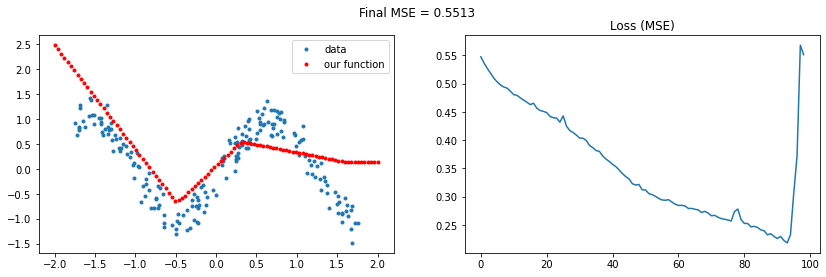

In [7]:
model = keras.Sequential([
    layers.Dense(units=7, activation='relu', input_shape=(1,)),
    layers.Dense(units=15, activation='relu'),
    layers.Dense(units=1, name='regression')
])

x,y = generate_data_1d(points=200, min=1000, max=1010, fn=np.sin, noise=0.2)
pred_x = np.linspace(start=-2, stop=2, num=100)

scale = StandardScaler()
x = scale.fit_transform(x)

model.compile(loss='mse', optimizer=optimizers.SGD(0.1))
hist = model.fit(x, y, epochs=99, batch_size=100, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 4</strong>
  <p>Train a MLP to fit the data</p>
<div>

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_9 (Dense)              (None, 20)                320       
_________________________________________________________________
dense_10 (Dense)             (None, 15)                315       
_________________________________________________________________
regression (Dense)           (None, 1)                 16        
Total params: 836
Trainable params: 836
Non-trainable params: 0
_________________________________________________________________


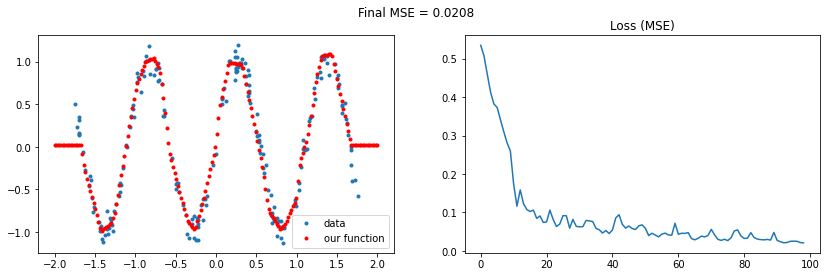

In [8]:
model = keras.Sequential([
    layers.Dense(units=10, activation='relu', input_shape=(1,)),
    layers.Dense(units=15, activation='relu'),
    layers.Dense(units=20, activation='relu'),
    layers.Dense(units=15, activation='relu'),
    layers.Dense(units=1, name='regression')
])

model.summary()

x,y = generate_data_1d(points=200, min=-10, max=10, fn=np.sin,  noise=0.1)
pred_x = np.linspace(start=-2, stop=2, num=200)
scale = StandardScaler()
x = scale.fit_transform(x)

model.compile(loss='mse', optimizer=optimizers.Adam(0.01))
hist = model.fit(x, y, epochs=99, batch_size=5, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 5</strong>
  <p>Train a MLP to fit the data</p>
<div>

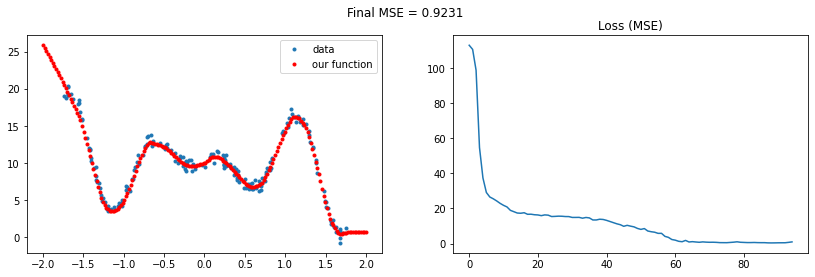

In [9]:
model = keras.Sequential([
    layers.Dense(units=80, activation='relu', input_shape=(1,)),
    layers.Dense(units=96, activation='relu'),
    layers.Dense(units=112, activation='relu'),
    layers.Dense(units=140, activation='relu'),
    layers.Dense(units=168, activation='relu'),
    layers.Dense(units=122, activation='relu'),
    layers.Dense(units=148, activation='relu'),
    layers.Dense(units=178, activation='relu'),
    layers.Dense(units=200, activation='relu'),
    layers.Dense(units=154, activation='relu'),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=74, activation='relu'),
    layers.Dense(units=58, activation='relu'),
    layers.Dense(units=36, activation='relu'),
    layers.Dense(units=24, activation='relu'),
    layers.Dense(units=10, activation='relu'),
    layers.Dense(units=1, name='regression')
])

x,y = generate_data_1d(points=200, min=-10, max=10, fn=lambda x: np.cos(x)*x+10, noise=0.5)
pred_x = np.linspace(start=-2, stop=2, num=200)
scale = StandardScaler()
x = scale.fit_transform(x)

model.compile(loss='mse', optimizer='adam')
hist = model.fit(x, y, epochs=95, batch_size=50, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 6</strong>
  <p>Train a MLP to fit the data.</p>
  <p>Train a LGBMRegressor to fit the data and visualize the predictions</p>
<div>

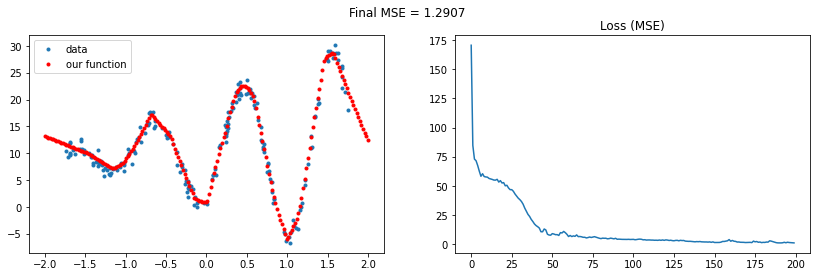

In [11]:
model = keras.Sequential([
    layers.Dense(units=10, activation='relu', input_shape=(1,)),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=500, activation='relu'),
    layers.Dense(units=1)
])

x,y = generate_data_1d(points=200, min=0, max=20, fn=lambda x: np.cos(x)*x+10, noise=1)
pred_x = np.linspace(start=-2, stop=2, num=200).reshape(200,-1)
scale = StandardScaler()
x = scale.fit_transform(x)

model.compile(loss='mse', optimizer=optimizers.Adam(0.01))
hist = model.fit(x, y, epochs=200, batch_size=50, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=44192bfb-fecf-4bf0-b979-a423a8f67f36' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>